# Stellar Classification
Henry Fernandez, Dylaan Cornish, Renato Tizon

#### Executive Summary:

In this notebook, our analytics team consisting of Henry Fernandez, Dylaan Cornish and Renato Tizon explores the Stellar Classification dataset from kaggle to perform multi-class classification per the request of our client, a small astronomical observatory. We implement 3 simple classification models, 2 ensemble classification models, and 1 artificial neural network. The classification accuracy and run-time are calculated for each model and compared against one-another in order to choose the most optimal model for the task. Ultimately, Decision Tree Classifier stands out as the best model stellar classification. Our entire analysis is below:

### Problem Statement / Research Objectives:

Our client is an astronomical observatory that runs a publication about astronomical events, cosmology, planets, galaxies, asteroids, astrophotography. They have a stellar classification dataset of 100,00 observations, with information on the objects Right Ascension, declination, UGRIZ, Redshift and other features. The client wants to use Machine Learning to determine whether what they're observing is a Star, a Galaxy, or a Quasi-Stellar Object (QSO) (QSO is class of objects beyond our Milky Way Galaxy that have a starlike visual appearance except that the optical spectrum has a large redshift). This is a small observatory with limited resources and funding. They've hired us as data scientists to build the best model in performing this classification WITHOUT using too much computational power and runtime. In short, they want us to build the simplest and best possible model to perform the clsasification they need. Our research objective is to compare both the accuracy and speed of each model and determine the best one for this astronomical observatory and their limited resources and time constraints.

Import Packages

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

# EDA

In [14]:
#read in data (assumes csv is in same folder as this notebook)
data = pd.read_csv('/star_classification.csv')
data.shape

(100000, 18)

In [15]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
#Data Dictionary
data_dictionary = {
    'obj_ID':'Object Identifier', 
    'alpha':'Right Ascension:the astronomical equivalent of longitude. Right ascension is the angular distance ofan object measured eastward from the First Point of Aries, also called the Vernal Equinox', 
    'delta': 'Declination: the astronomical equivalent of latitude. Declination is an angular distance of a pointnorth or south of the Celestial Equator, a projection of the Earth’s equator into space. Declination is measured in degrees from -90° to +90°.',
    'u': 'Ultraviolet, Effective Wavelength Midpoint λ(eff) = 365nm',
    'g': 'Green, Effective Wavelength Midpoint λ(eff) = 464nm',
    'r': 'Red, Effective Wavelength Midpoint λ(eff) = 658nm',
    'i': 'Infrared, Effective Wavelength Midpoint λ(eff) = 806nm',
    'z': 'Z, Effective Wavelength Midpoint λ(eff) = 900nm',
    'run_ID': 'Run Number',
    'rerun_ID': 'Rerun Number',
    'cam_col': 'Camera Column',
    'field_ID':'Field Number',
    'spec_obj_ID':'Object Identifier',
    'class': 'Output Class',
    'redshift': 'Red shift is a key concept for astronomers. The term can be understood literally - the wavelength of the light is stretched, so the light is seen as shifted towards the red part of the spectrum.',
    'plate': 'Plate Number',
    'MJD': 'Modified Julian Date',
    'fiber_ID': 'fiber ID'
    }

#### Photometric Letters

Each letter designates a section of light of the electromagnetic spectrum; these cover well the consecutive major groups, near-ultraviolet (NUV), visible light (centered on the V band), near-infrared (NIR) and part of mid-infrared (MIR).[a]

The letters are not standards, but are recognized by common agreement among astronomers and astrophysicists.

The use of U,B,V,R,I bands dates from the 1950s, being single-letter abbreviations.[b] With the advent of infrared detectors in the next decade, the J to N bands were labelled following on from near-infrared's closest-to-red band, I. Later the H band was inserted, then Z in the 1990s and finally Y, without changing earlier definitions. Hence, H is out of alphabetical order from its neighbours, while Z,Y are reversed from the alphabetical – higher-wavelength – sub-series which dominates current photometric bands.

In [5]:
display(data.describe())
display(data.info())

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

None

In [16]:
#Make Classes Numeric before training model
data['class'].replace(['GALAXY', 'STAR','QSO'],
                        [0, 1,2], inplace=True)

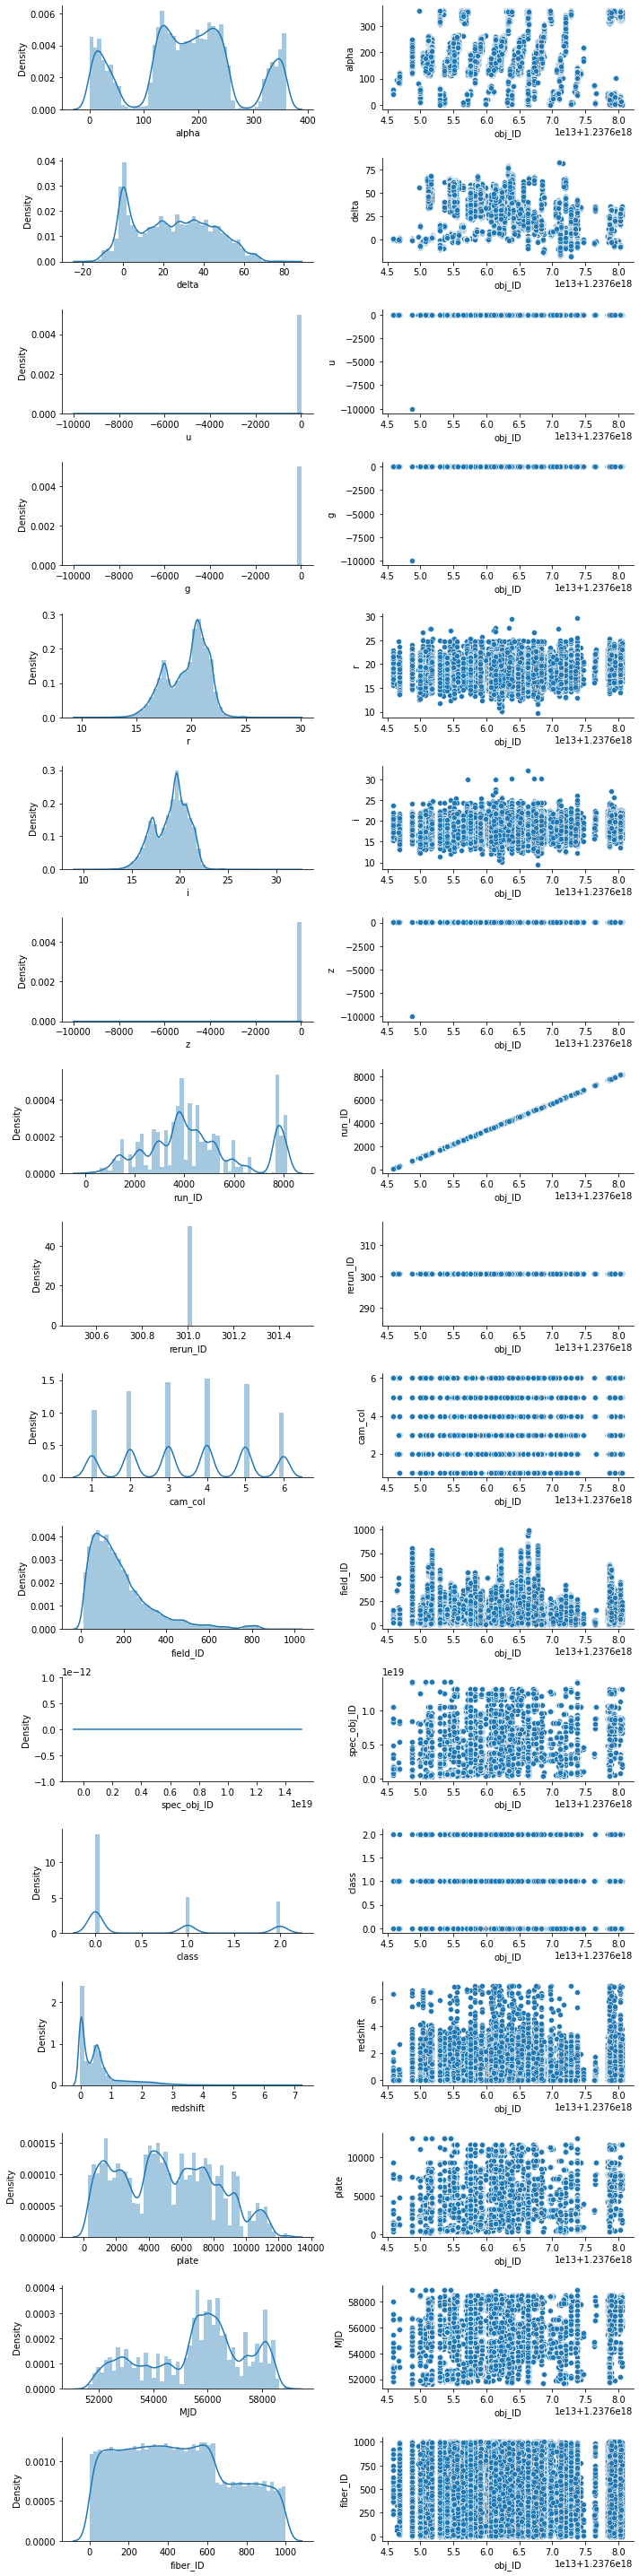

In [7]:
#Plot Scatterplots and Distributions

fig,ax=plt.subplots(figsize=(10,40),ncols=2,nrows=17)
plot_data = data.select_dtypes(include=["int","float"])

for i in np.arange(1,len(data.columns)):
    sns.distplot(data.iloc[:,i],ax=ax[i-1,0]);
                

for i in np.arange(1,len(data.columns)):
    sns.scatterplot(data.obj_ID,data.iloc[:,i],ax=ax[i-1,1]);
    
plt.tight_layout()
sns.despine(bottom=False,left=False)

Need to drop ID-related columns as well ast MJD (date), Plate, and Cam_Col

In [17]:
#Drop ID related columns
id_cols = ['rerun_ID','obj_ID','run_ID','field_ID','fiber_ID','spec_obj_ID']
data = data.drop(id_cols, axis = 1)
useless = ['MJD', 'plate', 'cam_col']
data = data.drop(useless, axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08641c1510>,
      dtype=object)

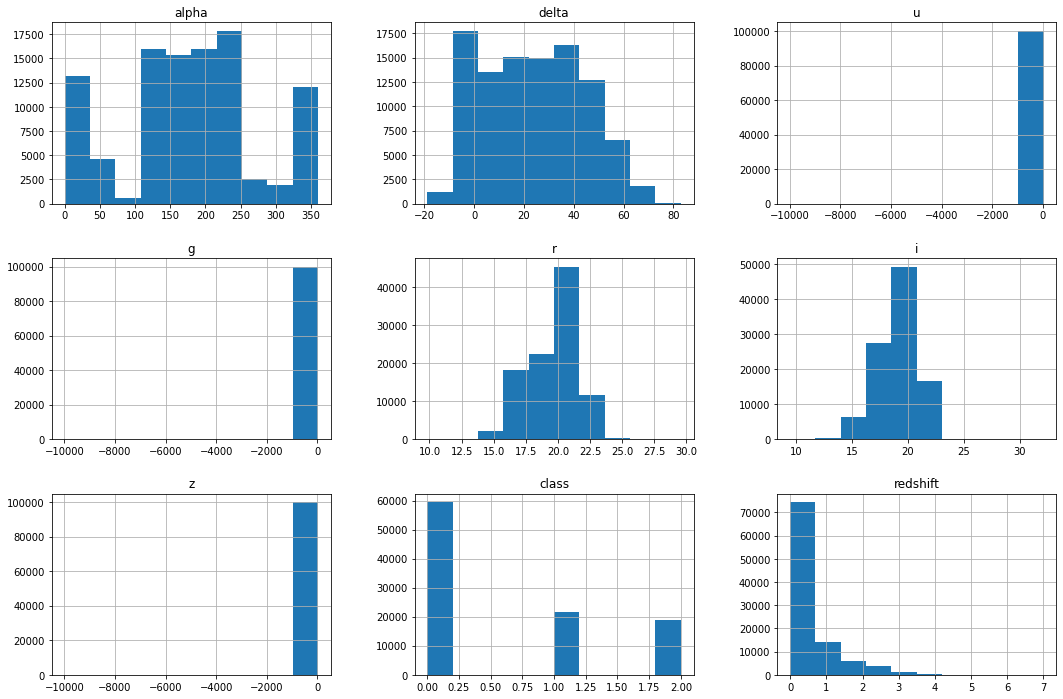

In [9]:
#Plot Histograms of remaining Features
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
data.hist(figsize=(18,12))

In [10]:
#Plot Heatmap
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,alpha,delta,u,g,r,i,z,class,redshift
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,0.004552,0.001667
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,0.056643,0.031638
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,-0.017701,0.014309
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,-0.005915,0.022954
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.150691,0.433241
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.284396,0.492383
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.017352,0.030380
class,0.004552,0.056643,-0.017701,-0.005915,0.150691,0.284396,0.017352,1.000000,0.536822
redshift,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,0.536822,1.000000


<Figure size 432x288 with 0 Axes>

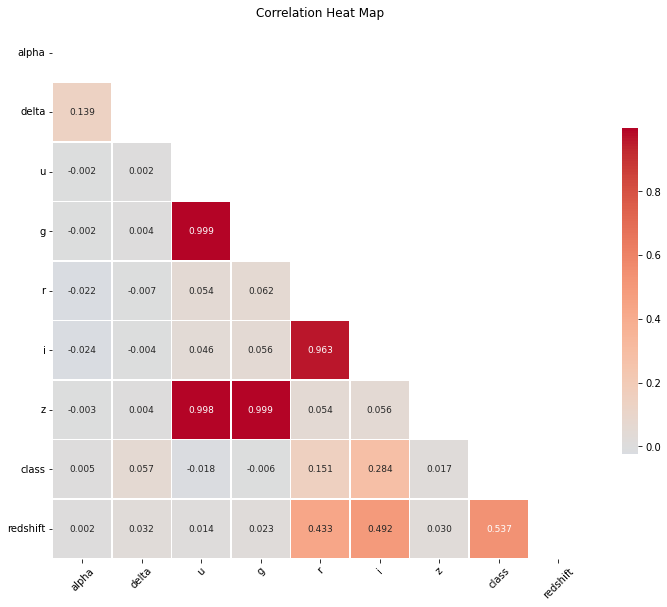

In [11]:
#Correlation Chart
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# examine correlations
corr_chart(df_corr = data) 

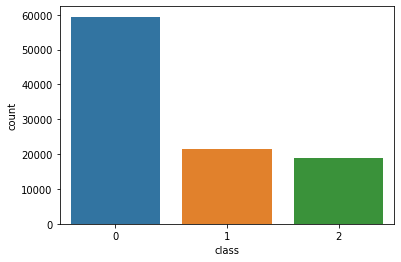

In [12]:
#Count of Class types to check for imbalance
sns.countplot(x = 'class', data = data)

,u,g,r,i,z
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.980468,20.531387,19.645762,19.084854,18.668810
std,31.769291,31.750292,1.854760,1.757895,31.728152
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000
25%,20.352353,18.965230,18.135828,17.732285,17.460677
50%,22.179135,21.099835,20.125290,19.405145,19.004595
75%,23.687440,22.123767,21.044785,20.396495,19.921120
max,32.781390,31.602240,29.571860,32.141470,29.383740


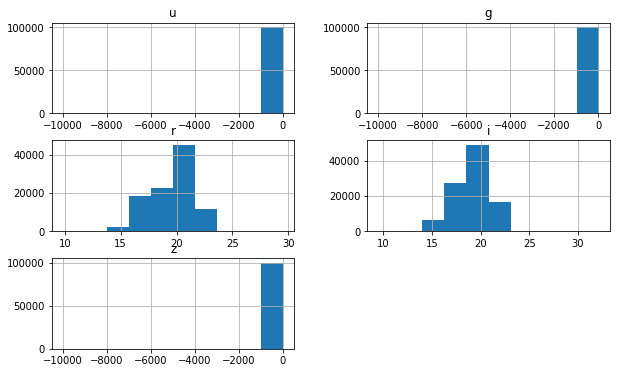

In [13]:
#Investigating UGRIZ

ugriz = data[['u','g','r','i','z']]
ugriz.hist(figsize= (10,6))

data[['u','g','r','i','z']].describe()

### We need to scale this part of the data

In [18]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler

#Going to scale UGRIZ columns. 
mms = MinMaxScaler()

data[['u','g','r','i','z']] = mms.fit_transform(data[['u','g','r','i','z']])


In [19]:
data[['u','g','r','i','z']].describe()

,u,g,r,i,z
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.998923,0.998896,0.497407,0.424097,0.998932
std,0.003167,0.003165,0.093913,0.077537,0.003164
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.998761,0.998740,0.420954,0.364438,0.998811
50%,0.998943,0.998953,0.521688,0.438225,0.998965
75%,0.999093,0.999055,0.568245,0.481951,0.999056
max,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0861266a50>,
      dtype=object)

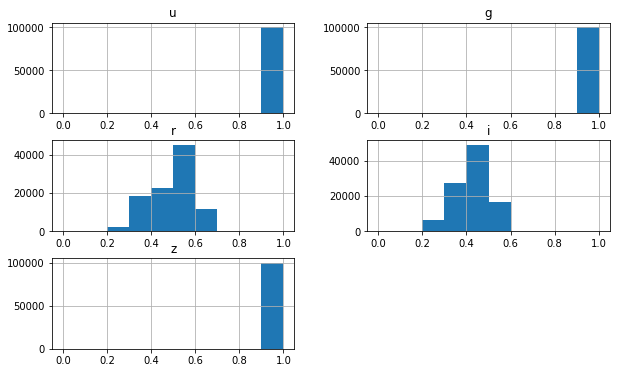

In [16]:
data[['u','g','r','i','z']].hist(figsize= (10,6))

In [17]:
data['class'].value_counts()

0    59445
1    21594
2    18961
Name: class, dtype: int64

0 = "Galaxy", 1 = "Star", 2 = "QSO" 

# Simplest Models: KNN & Naive Bayes & Decision Tree

In [20]:
#Do necessary imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics


In [21]:
#Split Data
X = data.drop(columns = ['class'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### K-Nearest Neighbors

In [5]:
#!pip install tensorflow_privacy
import tensorflow as tf
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPGradientDescentGaussianOptimizer

## Implementing Artificial Neural Network! 

Following Classification From: https://www.analyticsvidhya.com/blog/2021/10/implementing-artificial-neural-networkclassification-in-python-from-scratch/

In [11]:
#Necessary Imports 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Activation, Dense, Flatten
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [25]:
X = data.drop(columns = ['class'])
y = data['class']

In [26]:
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
y = np.array(LE1.fit_transform(y))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
!pip install tensorflow_privacy
import tensorflow as tf
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPGradientDescentGaussianOptimizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

In [47]:
l2_norm_clip = 1.5
noise_multiplier = 1.3
num_microbatches = 250
learning_rate = 0.25
batch_size=250
epochs = 5

optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate)

loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True, reduction=tf.losses.Reduction.NONE)

In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=8,activation="relu"),
    tf.keras.layers.Dense(units=8,activation="relu"),
    tf.keras.layers.Dense(units=3,activation="softmax")
])


In [51]:

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=epochs,
          validation_data=(X_test, y_test),
          batch_size=batch_size)

Epoch 1/5
300/300 [==============================] - 14s 37ms/step - loss: 0.5803 - accuracy: 0.7795 - val_loss: 0.6795 - val_accuracy: 0.8580
Epoch 2/5
300/300 [==============================] - 15s 50ms/step - loss: 0.3954 - accuracy: 0.8821 - val_loss: 0.5857 - val_accuracy: 0.8999
Epoch 3/5
300/300 [==============================] - 10s 35ms/step - loss: 0.3082 - accuracy: 0.9094 - val_loss: 0.5205 - val_accuracy: 0.9194
Epoch 4/5
300/300 [==============================] - 9s 31ms/step - loss: 0.2754 - accuracy: 0.9208 - val_loss: 0.6111 - val_accuracy: 0.9226
Epoch 5/5
300/300 [==============================] - 9s 31ms/step - loss: 0.2574 - accuracy: 0.9285 - val_loss: 0.6433 - val_accuracy: 0.9331


In [53]:
compute_dp_sgd_privacy.compute_dp_sgd_privacy(n=X_train.shape[0],
                                              batch_size=batch_size,
                                              noise_multiplier=noise_multiplier,
                                              epochs=epochs,
                                              delta=1e-5)

DP-SGD with sampling rate = 0.333% and noise_multiplier = 1.3 iterated over 1500 steps satisfies differential privacy with eps = 0.579 and delta = 1e-05.
The optimal RDP order is 18.0.


(0.5789702577746796, 18.0)

### References

https://www.analyticsvidhya.com/blog/2021/10/implementing-artificial-neural-networkclassification-in-python-from-scratch/
https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17
https://earthsky.org/astronomy-essentials/what-is-a-redshift/
https://astronomy.stackexchange.com/questions/18986/what-is-the-ugriz-magnitude-system